# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests

from api_keys import g_key
from api_keys import weather_api_key

## Generate Cities List

In [50]:
import random
from citipy import citipy

#using random function to create uniform lat and lng ranges
lat = [random.uniform(-90,90) for x in range(2500)] #lat range (-90 to 90deg)
lng = [random.uniform(-180,180) for x in range(2500)] #lng range (-180 to 180deg)

coords = zip(lat,lng)

cities =[] #creating empty set

# cities

for coord in coords:
        city = citipy.nearest_city(coord[0],coord[1]).city_name
        if city not in cities:
            cities.append(city)

print(f"The list city has {len(cities)} cities")

# print(cities) ##testing



The list city has 881 cities


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#forming dataframe
df_cities = pd.DataFrame({"City":cities})

df_cities

,City
0,atuona
1,miles city
2,vaitupu
3,kampot
4,kuche
...,...
692,alyangula
693,fairbanks
694,kingaroy
695,san quintin


In [4]:
#API request
from pprint import pprint

base_url = f"http://api.openweathermap.org/data/2.5/weather"

print("Beginning Data Retrival")
print("--------------------------------")

for index, row in df_cities.iterrows():
    
    parameters = {
    "q":row["City"],
    "appid": weather_api_key,
    "units": "imperial"
    }
    
    try:
        response_data = requests.get(base_url, params=parameters).json()
        
         #Adding latitude to DF
        df_cities.loc[index, "Lat"]= response_data["coord"]["lat"]
        df_cities.loc[index, "Lng"]= response_data["coord"]["lon"]
        df_cities.loc[index, "Max Temp"]= response_data["main"]["temp_max"]
        df_cities.loc[index, "Humidity"]= float(response_data["main"]["humidity"])
        df_cities.loc[index, "Cloudiness"]= response_data["clouds"]["all"]
        df_cities.loc[index, "Wind Speed"]= response_data["wind"]["speed"]
        df_cities.loc[index, "Country"]= response_data["sys"]["country"]
        df_cities.loc[index, "Date"]= response_data["dt"]
                
        record = index + 1
        set_no = int(index/50)+1
        
        print(f"Processing Record {record} of Set {set_no} | {response_data['name']}")
        
    except KeyError:
        print(f"\n City not found. Skipping... \n")
        pass
    
print("--------------------------------")
print("Data Retrieval Complete")
print("--------------------------------")


Beginning Data Retrival
--------------------------------
Processing Record 1 of Set 1 | Atuona
Processing Record 2 of Set 1 | Miles City

 City not found. Skipping... 

Processing Record 4 of Set 1 | Kampot

 City not found. Skipping... 

Processing Record 6 of Set 1 | Staryy Nadym
Processing Record 7 of Set 1 | Busselton
Processing Record 8 of Set 1 | Avarua
Processing Record 9 of Set 1 | Rikitea
Processing Record 10 of Set 1 | Tuktoyaktuk
Processing Record 11 of Set 1 | Kaitangata
Processing Record 12 of Set 1 | Neuquén
Processing Record 13 of Set 1 | Belle Fourche
Processing Record 14 of Set 1 | Ushuaia
Processing Record 15 of Set 1 | New Norfolk
Processing Record 16 of Set 1 | Laguna

 City not found. Skipping... 

Processing Record 18 of Set 1 | Itoman
Processing Record 19 of Set 1 | Ponta do Sol

 City not found. Skipping... 


 City not found. Skipping... 

Processing Record 22 of Set 1 | Vaini
Processing Record 23 of Set 1 | Saint Anthony
Processing Record 24 of Set 1 | Kenai
P

Processing Record 199 of Set 4 | Mossamedes
Processing Record 200 of Set 4 | Pristina
Processing Record 201 of Set 5 | Edson
Processing Record 202 of Set 5 | Pisco
Processing Record 203 of Set 5 | Chanute
Processing Record 204 of Set 5 | Eravur
Processing Record 205 of Set 5 | Barcelona

 City not found. Skipping... 

Processing Record 207 of Set 5 | Guider
Processing Record 208 of Set 5 | Thompson
Processing Record 209 of Set 5 | Longyearbyen
Processing Record 210 of Set 5 | Kiryat Gat
Processing Record 211 of Set 5 | Lokosovo
Processing Record 212 of Set 5 | Guerrero Negro
Processing Record 213 of Set 5 | Lebu
Processing Record 214 of Set 5 | Cabo San Lucas
Processing Record 215 of Set 5 | Barcs
Processing Record 216 of Set 5 | Skopin
Processing Record 217 of Set 5 | Būkān
Processing Record 218 of Set 5 | Ust-Tsilma
Processing Record 219 of Set 5 | Zhanakorgan
Processing Record 220 of Set 5 | Marion
Processing Record 221 of Set 5 | Grand Forks
Processing Record 222 of Set 5 | Buchana

Processing Record 396 of Set 8 | Vestmannaeyjar
Processing Record 397 of Set 8 | Lakatoro

 City not found. Skipping... 

Processing Record 399 of Set 8 | Gold Coast
Processing Record 400 of Set 8 | Waipawa

 City not found. Skipping... 

Processing Record 402 of Set 9 | Solnechnyy
Processing Record 403 of Set 9 | Kenora
Processing Record 404 of Set 9 | Trelew
Processing Record 405 of Set 9 | Allāpalli
Processing Record 406 of Set 9 | Cabra
Processing Record 407 of Set 9 | Rodrigues Alves
Processing Record 408 of Set 9 | Tiznit Province
Processing Record 409 of Set 9 | Boguchany
Processing Record 410 of Set 9 | Adré
Processing Record 411 of Set 9 | Laas
Processing Record 412 of Set 9 | Hamilton
Processing Record 413 of Set 9 | Vostok
Processing Record 414 of Set 9 | Milverton
Processing Record 415 of Set 9 | Selishche
Processing Record 416 of Set 9 | Orán
Processing Record 417 of Set 9 | Benguela
Processing Record 418 of Set 9 | Tilichiki
Processing Record 419 of Set 9 | Havøysund
Proc

Processing Record 590 of Set 12 | Nakamura

 City not found. Skipping... 

Processing Record 592 of Set 12 | Egvekinot
Processing Record 593 of Set 12 | Teya
Processing Record 594 of Set 12 | Ballina
Processing Record 595 of Set 12 | Stokmarknes
Processing Record 596 of Set 12 | Smithers
Processing Record 597 of Set 12 | Chistogorskiy
Processing Record 598 of Set 12 | Cairns
Processing Record 599 of Set 12 | Olafsvik
Processing Record 600 of Set 12 | Hualmay
Processing Record 601 of Set 13 | Skibbereen
Processing Record 602 of Set 13 | Bilibino
Processing Record 603 of Set 13 | Omboué
Processing Record 604 of Set 13 | Butembo
Processing Record 605 of Set 13 | North Bend
Processing Record 606 of Set 13 | Saint-Augustin
Processing Record 607 of Set 13 | Ol'ga
Processing Record 608 of Set 13 | Gizo Government Station
Processing Record 609 of Set 13 | Bozoum
Processing Record 610 of Set 13 | Mikhaylovka
Processing Record 611 of Set 13 | Kaseda-shirakame
Processing Record 612 of Set 13 | La

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
#displaying DF
df_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,atuona,-9.8000,-139.0333,77.67,74.0,16.0,14.72,PF,1.635150e+09
1,miles city,46.4083,-105.8406,47.52,76.0,1.0,16.11,US,1.635150e+09
2,vaitupu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,kampot,10.6167,104.1833,83.17,76.0,98.0,10.04,KH,1.635150e+09
4,kuche,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
692,alyangula,-13.8483,136.4192,87.67,62.0,59.0,10.36,AU,1.635151e+09
693,fairbanks,64.8378,-147.7164,24.76,90.0,75.0,0.00,US,1.635151e+09
694,kingaroy,-26.5333,151.8333,64.44,100.0,75.0,8.05,AU,1.635151e+09
695,san quintin,30.4833,-115.9500,61.56,89.0,31.0,5.44,MX,1.635151e+09


In [6]:
df_cities.to_csv("output.csv", index=True, index_label="City No.")

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
df_cities["Humidity"] 

0       74.0
1       76.0
2        NaN
3       76.0
4        NaN
       ...  
692     62.0
693     90.0
694    100.0
695     89.0
696     91.0
Name: Humidity, Length: 697, dtype: float64

In [8]:
#  Get the indices of cities that have humidity over 100%
df_humidity_100 = df_cities.loc[df_cities["Humidity"] > 100, :]

df_humidity_100

#Therefore no cities where the humidity is greater than 100%

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# df_cities_cleaned = df_cities.drop(df_humidity_100)

# df_cities_cleaned

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

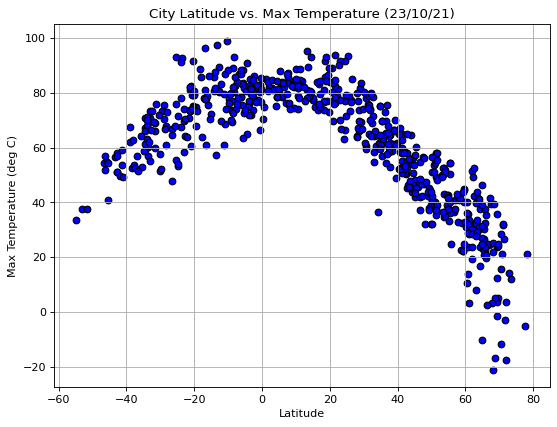

In [10]:
latitudes = pd.to_numeric(df_cities["Lat"])
temperatures = pd.to_numeric(df_cities["Max Temp"])

#generating scatter plot lat vs temperature
plt.figure(figsize=(8, 6), dpi=80) #re-sizing the plot 
plt.scatter(latitudes, temperatures, marker="o", facecolors="blue", edgecolors="black")

#addings title, x & y labels and grid to the scatter plot
plt.title("City Latitude vs. Max Temperature (23/10/21)")
plt.ylabel("Max Temperature (deg C)")
plt.xlabel("Latitude")
plt.grid()

#saving png image file in the folder
plt.savefig("Fig1.png")
#displaying scatter plot
plt.show()

##analysis
#Temperatures increase moving closer towards the equator. 
#Some cities in the Northern hemisphere experience lower temperatures (in the negatives) due to their 
#location being closer to the north pole

## Latitude vs. Humidity Plot

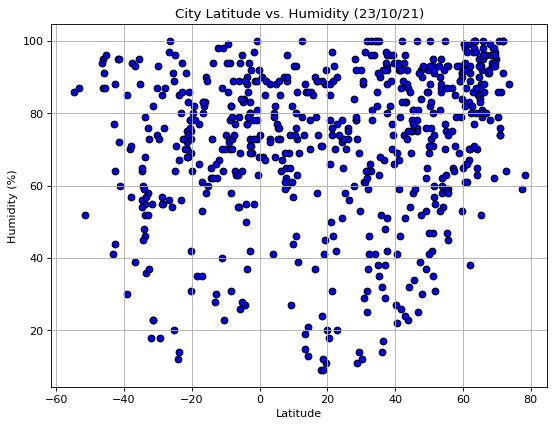

In [11]:
#generating scatter plot lat vs temperature
humidity = df_cities["Humidity"]

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(latitudes, humidity, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Humidity (23/10/21)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("Fig2.png")
plt.show()

#analysis
#More cities have humidity 60% or higher. 
#All cities at the equator (0 deg) latitude have humidity 60% or higher
#More cities have lower humidity levels at the tropics

## Latitude vs. Cloudiness Plot

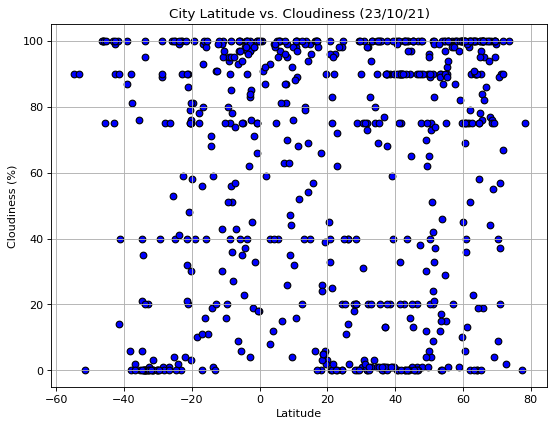

In [12]:
#Generating scatter plot. Steps - same as above. 
cloudiness = pd.to_numeric(df_cities["Cloudiness"])

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(latitudes, cloudiness, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Cloudiness (23/10/21)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("Fig3.png")
plt.show()

##analysis
#At 0 deg lat, more cities  have 100% cloudiness 
#cities located at the tropics have lower cloudiness percentages
#again cities far in the northern hemisphere (60-80deg) tend to have higher percentage of cloudiness


## Latitude vs. Wind Speed Plot

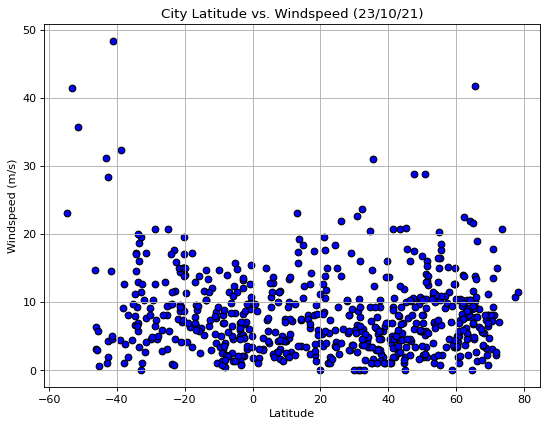

In [13]:
from matplotlib.pyplot import figure

#generating scatter plot lat vs temperature
winds = pd.to_numeric(df_cities["Wind Speed"])

plt.figure(figsize=(8, 6), dpi=80)
plt.scatter(latitudes, winds, marker="o", facecolors="blue", edgecolors="black")

plt.title("City Latitude vs. Windspeed (23/10/21)")

plt.ylabel("Windspeed (m/s)")
plt.xlabel("Latitude")
plt.grid()

plt.savefig("Fig4.png")
plt.show()

#analysis
#

## Linear Regression

In [14]:
#copying dataframe this analysis 
df_cities_hemispheres = df_cities.copy().dropna()

#adding "Hemisphere" column 
df_cities_hemispheres["Hemisphere"] = ""

df_cities_hemispheres

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemisphere
0,atuona,-9.8000,-139.0333,77.67,74.0,16.0,14.72,PF,1.635150e+09,
1,miles city,46.4083,-105.8406,47.52,76.0,1.0,16.11,US,1.635150e+09,
3,kampot,10.6167,104.1833,83.17,76.0,98.0,10.04,KH,1.635150e+09,
5,staryy nadym,65.6118,72.6842,26.55,79.0,84.0,9.28,RU,1.635150e+09,
6,busselton,-33.6500,115.3333,60.04,52.0,95.0,16.06,AU,1.635150e+09,
...,...,...,...,...,...,...,...,...,...,...
692,alyangula,-13.8483,136.4192,87.67,62.0,59.0,10.36,AU,1.635151e+09,
693,fairbanks,64.8378,-147.7164,24.76,90.0,75.0,0.00,US,1.635151e+09,
694,kingaroy,-26.5333,151.8333,64.44,100.0,75.0,8.05,AU,1.635151e+09,
695,san quintin,30.4833,-115.9500,61.56,89.0,31.0,5.44,MX,1.635151e+09,


In [15]:
for index, row in df_cities_hemispheres.iterrows():
    if row["Lat"] > 0:
        df_cities_hemispheres.loc[index,"Hemisphere"]= "Northern Hemisphere"
    elif row["Lat"] < 0:
        df_cities_hemispheres.loc[index,"Hemisphere"]= "Southern Hemisphere"
    elif row["Lat"] == 0:
        df_cities_hemispheres.loc[index,"Hemisphere"]= "Equator" 
    
df_cities_hemispheres

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Hemisphere
0,atuona,-9.8000,-139.0333,77.67,74.0,16.0,14.72,PF,1.635150e+09,Southern Hemisphere
1,miles city,46.4083,-105.8406,47.52,76.0,1.0,16.11,US,1.635150e+09,Northern Hemisphere
3,kampot,10.6167,104.1833,83.17,76.0,98.0,10.04,KH,1.635150e+09,Northern Hemisphere
5,staryy nadym,65.6118,72.6842,26.55,79.0,84.0,9.28,RU,1.635150e+09,Northern Hemisphere
6,busselton,-33.6500,115.3333,60.04,52.0,95.0,16.06,AU,1.635150e+09,Southern Hemisphere
...,...,...,...,...,...,...,...,...,...,...
692,alyangula,-13.8483,136.4192,87.67,62.0,59.0,10.36,AU,1.635151e+09,Southern Hemisphere
693,fairbanks,64.8378,-147.7164,24.76,90.0,75.0,0.00,US,1.635151e+09,Northern Hemisphere
694,kingaroy,-26.5333,151.8333,64.44,100.0,75.0,8.05,AU,1.635151e+09,Southern Hemisphere
695,san quintin,30.4833,-115.9500,61.56,89.0,31.0,5.44,MX,1.635151e+09,Northern Hemisphere


In [16]:
#df for NH
northern_hemisphere = df_cities_hemispheres.loc[df_cities_hemispheres["Hemisphere"]=="Northern Hemisphere", :]
#checking distribution of sitives along the longitudes
count1 = northern_hemisphere["City"].count()
print(f"There are {count1} cities are in the Northern Hemisphere ")

#df for SH
southern_hemisphere = df_cities_hemispheres.loc[df_cities_hemispheres["Hemisphere"]=="Southern Hemisphere", :]
count2 = southern_hemisphere["City"].count()
print(f"There are {count2} cities are in the Southern Hemisphere ")

There are 426 cities are in the Northern Hemisphere 
There are 209 cities are in the Southern Hemisphere 


In [17]:
temp_NH = northern_hemisphere["Max Temp"]
temp_SH = southern_hemisphere["Max Temp"]
lat_NH = northern_hemisphere["Lat"]
lat_SH = southern_hemisphere["Lat"]
humidity_NH = northern_hemisphere["Humidity"]
humidity_SH = southern_hemisphere["Humidity"]
cloudiness_NH = northern_hemisphere["Cloudiness"]
cloudiness_SH = southern_hemisphere["Cloudiness"]
windspeed_NH = northern_hemisphere["Wind Speed"]
windspeed_SH = southern_hemisphere["Wind Speed"]

In [41]:
import scipy.stats as st

def linear_regression(x_value,y_value,x_label,y_label,title):
    correlation = st.pearsonr(x_value,y_value)
    
    slope, intercept, r_value, p_value, std_error = st.linregress(x_value, y_value)
    print(f"The r-value is {r_value}")

    regress_values = x_value * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.figure(figsize=(8, 6), dpi=80)
    plt.scatter(x_value,y_value, marker="o", facecolors="blue", edgecolors="black")
    plt.plot(x_value,regress_values,"r-")
    plt.annotate(line_eq,(min(x_value),min(y_value)),fontsize=20,color="red")

    plt.xlabel(f"{x_label}")
    plt.ylabel(f"{y_label}")
    plt.title(f"{title}")

    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.9019950555341296


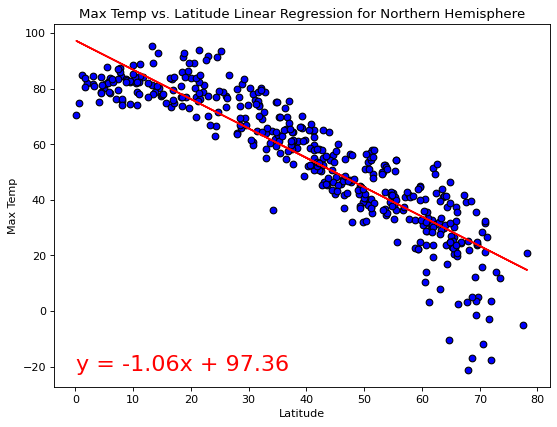

In [42]:
x_value = lat_NH
y_value = temp_NH
x_label = "Latitude" 
y_label = "Max Temp"
title = "Max Temp vs. Latitude Linear Regression for Northern Hemisphere"

linear_regression(x_value,y_value,x_label,y_label,title)

#linear regression is modelling negative correlation - decrease in lat -> increase in temp
#moving from north pole to the equator, temperature increases

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.7298617514306327


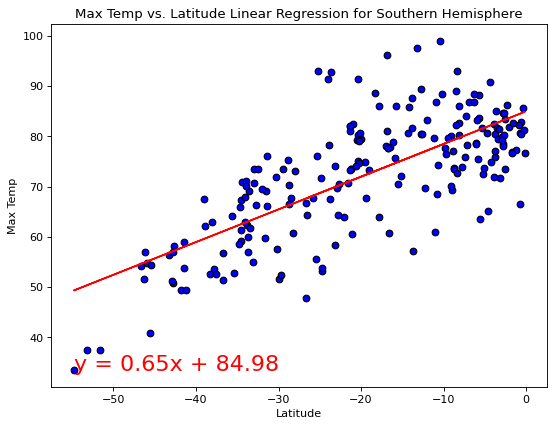

In [43]:
x_value = lat_SH
y_value = temp_SH
x_label = "Latitude"
y_label = "Max Temp"
title = "Max Temp vs. Latitude Linear Regression for Southern Hemisphere"

linear_regression(x_value,y_value,x_label,y_label,title)

#linear regression is modelling positive correlation - increase in lat -> increase in temp
#moving from south pole to the equator, temperature increases

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.2579662899189715


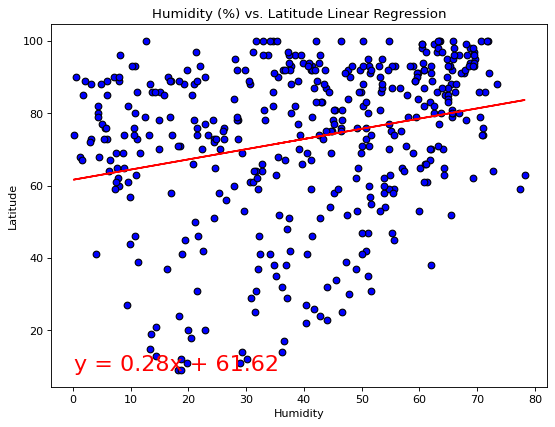

In [44]:
x_value = lat_NH
y_value = humidity_NH
x_label = "Humidity"
y_label = "Latitude"
title = "Humidity (%) vs. Latitude Linear Regression"

linear_regression(x_value,y_value,x_label,y_label,title)

#linear regression is modelling a flat line
#conclusion - no correlation between humidity and lat

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.07986735087604399


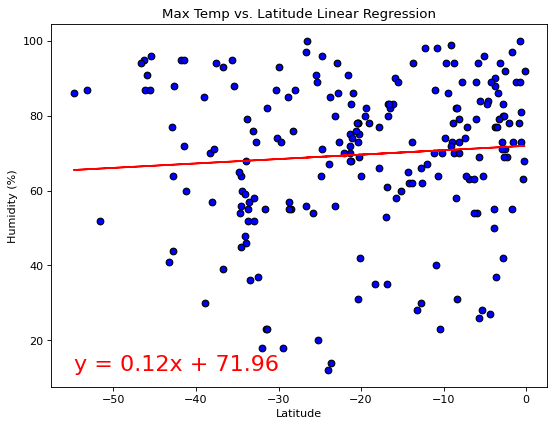

In [45]:
x_value = lat_SH
y_value = humidity_SH
x_label = "Latitude"
y_label = "Humidity (%)"
title = "Max Temp vs. Latitude Linear Regression"

linear_regression(x_value,y_value,x_label,y_label,title)

#same as for northern hemisphere
#linear regression is modelling a flat line and low r-value
#conclusion - no correlation between humidity and lat

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.0951919662841778


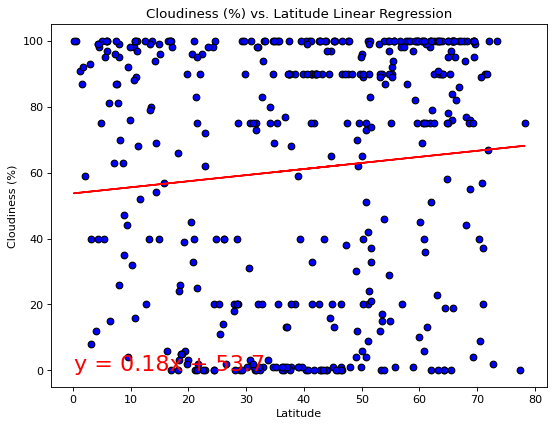

In [46]:
x_value = lat_NH
y_value = cloudiness_NH
x_label = "Latitude"
y_label = "Cloudiness (%)"
title = "Cloudiness (%) vs. Latitude Linear Regression"

linear_regression(x_value,y_value,x_label,y_label,title)

#linear regression is modelling a flat line and low r-value
#conclusion - no correlation between cloudiness and lat

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.22530166626664752


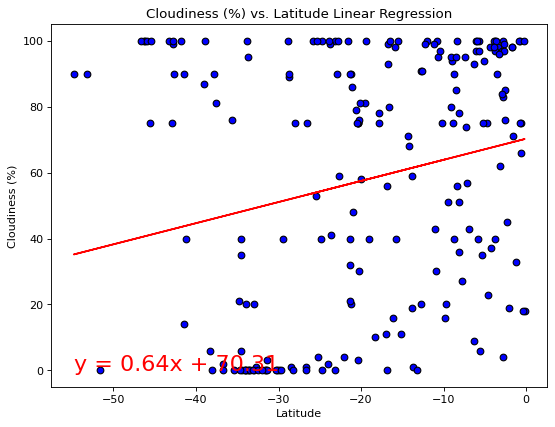

In [47]:
x_value = lat_SH
y_value = cloudiness_SH
x_label = "Latitude"
y_label = "Cloudiness (%)"
title = "Cloudiness (%) vs. Latitude Linear Regression"

linear_regression(x_value,y_value,x_label,y_label,title)

#linear regression is modelling a flat line and low r-value
#conclusion - no correlation between cloudiness and lat

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.09455232640467186


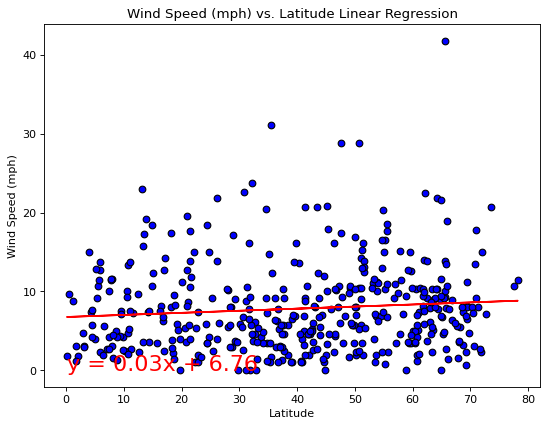

In [48]:
x_value = lat_NH
y_value = windspeed_NH
x_label = "Latitude"
y_label = "Wind Speed (mph)"
title = "Wind Speed (mph) vs. Latitude Linear Regression"

linear_regression(x_value,y_value,x_label,y_label,title)

#linear regression is modelling a flat line and low r-value
#conclusion - no correlation between windspeed and lat

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.3245459673349062


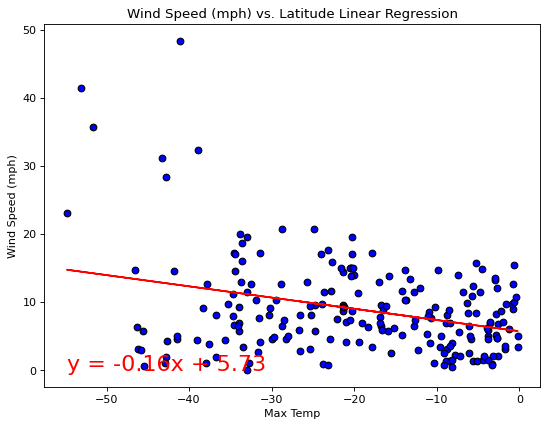

In [49]:
x_value = lat_SH
y_value = windspeed_SH
x_label = "Max Temp"
y_label = "Wind Speed (mph)"
title = "Wind Speed (mph) vs. Latitude Linear Regression"

linear_regression(x_value,y_value,x_label,y_label,title)

#linear regression is modelling a flat line and low r-value
#conclusion - no correlation between windspeed and lat